# Example 1

ToC:
0. Normal
1. Near match
2. Prepare text
4. Automatic dictionary (table and graph)

## 1. Normal

In [5]:
from collatex import *
collation = Collation()
A = open( "data/example1/A.txt", encoding='utf-8' ).read()
F = open( "data/example1/F.txt", encoding='utf-8' ).read()
G = open( "data/example1/G.txt", encoding='utf-8' ).read()
H = open( "data/example1/H.txt", encoding='utf-8' ).read()
M = open( "data/example1/M.txt", encoding='utf-8' ).read()
P = open( "data/example1/P.txt", encoding='utf-8' ).read()
R = open( "data/example1/R.txt", encoding='utf-8' ).read()
S = open( "data/example1/S.txt", encoding='utf-8' ).read()
V = open( "data/example1/V.txt", encoding='utf-8' ).read()
collation.add_plain_witness( "A", A )
collation.add_plain_witness( "F", F )
collation.add_plain_witness( "G", G )
collation.add_plain_witness( "H", H )
collation.add_plain_witness( "M", F )
collation.add_plain_witness( "P", G )
collation.add_plain_witness( "R", H )
collation.add_plain_witness( "S", F )
collation.add_plain_witness( "V", G )
table = collate(collation, output='html2', segmentation=False)
print(table)

None



## 2. Near match

In this method, the parameter 'near_match' of the function 'collate' is switched on, for allowing fuzzy matches in the alignment (or better, in a second round of alignment, which refines the first).

In [6]:
from collatex import *
collation = Collation()
A = open( "data/example1/A.txt", encoding='utf-8' ).read()
F = open( "data/example1/F.txt", encoding='utf-8' ).read()
G = open( "data/example1/G.txt", encoding='utf-8' ).read()
H = open( "data/example1/H.txt", encoding='utf-8' ).read()
M = open( "data/example1/M.txt", encoding='utf-8' ).read()
P = open( "data/example1/P.txt", encoding='utf-8' ).read()
R = open( "data/example1/R.txt", encoding='utf-8' ).read()
S = open( "data/example1/S.txt", encoding='utf-8' ).read()
V = open( "data/example1/V.txt", encoding='utf-8' ).read()
collation.add_plain_witness( "A", A )
collation.add_plain_witness( "F", F )
collation.add_plain_witness( "G", G )
collation.add_plain_witness( "H", H )
collation.add_plain_witness( "M", F )
collation.add_plain_witness( "P", G )
collation.add_plain_witness( "R", H )
collation.add_plain_witness( "S", F )
collation.add_plain_witness( "V", G )
table = collate(collation, output='html2', near_match=True, segmentation=False)
print(table)

None


## 3. Prepare text for next collation
### All to lower cases, strip punctuation and apostrophes

In [ ]:
## All to lower cases and strip punctuation and apostrophes
## this goes file per file. To do: all files together

from itertools import chain
from glob import glob
import re

with open('data/example1original/V.txt', 'r') as file:
    file = file.read()
    
    file = re.sub('\.','',re.sub("'",' ',file))

lines = [line.lower() for line in file]

with open('data/example1/V.txt', 'w') as out:
     out.writelines(lines)

## 4. Automatic dictionary (table and graph)

This method creates a dictionary, using the [TreeTagger](http://www.cis.uni-muenchen.de/~schmid/tools/TreeTagger/) parameters for old French:
- the [Nouveau corpus d’Amsterdam](http://www.uni-stuttgart.de/lingrom/stein/corpus) parameter file provides POS annotation and lemma, here only lemma is used;
- the [Base de français médiéval](http://txm.bfm-corpus.org) parameter file provides POS annotation, used here.

The joint effort of the two équipes are now available in the Github repository [Medieval French Language Toolkit](https://github.com/sheiden/Medieval-French-Language-Toolkit).

The tagged forms are used for the alignment.

This method produces three outputs:
- a table and a graph, for which see below here; 
- an external table, where formal and substantive variants are separated.

taggedAll and taggedDistinct created in folder Dictionaries/ !


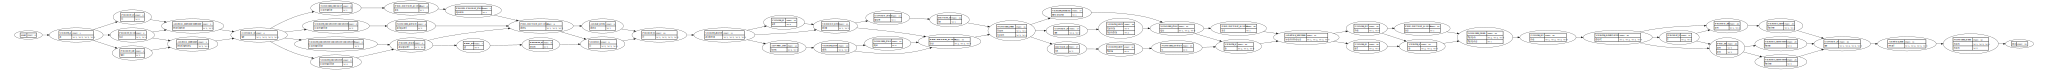

external table created!


In [4]:
from collatex import *
collation = Collation()
import csv, re
from general_functions import tag_poslemma
from general_functions import table_automaticDictionary


tag_poslemma('example1')  # ex: create_poslemma('example1')
print("taggedAll and taggedDistinct created in folder Dictionaries/ !")


A = open( "data/example1/A.txt", encoding='utf-8' ).read()
F = open( "data/example1/F.txt", encoding='utf-8' ).read()
G = open( "data/example1/G.txt", encoding='utf-8' ).read()
H = open( "data/example1/H.txt", encoding='utf-8' ).read()

#create the dictionary consisting of two columns, separated by a comma.
# The first Column 'Original' are the strings as found in the text, 
# the second column 'Normalised' contains the strings you want to replace them with. 
# No whitespaces behind the strings.
Normit = {}
with open('dictionaries/taggedDistinct_example1.csv') as csvfile:
    reader = csv.DictReader(csvfile, fieldnames=['Original', 'Normalised'])
    for row in reader:
        Normit[row['Original']]= row['Normalised']

#read in the witnesses  from your file system 
from collatex.core_classes import WordPunctuationTokenizer
tokenizer = WordPunctuationTokenizer()

# build a function to tokenize and to normalize by replace keys to be 
# found in the dictionary by the corresponding values 
def tokennormalizer(witness) :
    tokens_as_strings = tokenizer.tokenize(witness)
    list = []
    for token_string in tokens_as_strings:
        normversion = re.sub(r'\s+$',"", token_string)
        replaceversion = Normit.get(normversion,normversion)
        list.append({'t':token_string, 'n':replaceversion})
    return(list)

#collate
tokens_A = tokennormalizer(A) 
tokens_F = tokennormalizer(F) 
tokens_G = tokennormalizer(G) 
tokens_H = tokennormalizer(H) 

witness_A = { "id": "W1", "tokens":tokens_A }
witness_F = { "id": "W2", "tokens":tokens_F }
witness_G = { "id": "W3", "tokens":tokens_G }
witness_H = { "id": "W4", "tokens":tokens_H }


input = { "witnesses": [ witness_A, witness_F, witness_G, witness_H ] }


table = collate(input, output='html2', segmentation=False)
graphSvg = collate(input, output='svg', segmentation=False)

graph_automaticDictionary = collate(input, output='json', segmentation=False)
table_automaticDictionary(graph_automaticDictionary, 'example1')
print('external table created!')

taggedAll and taggedDistinct created in folder Dictionaries/ !


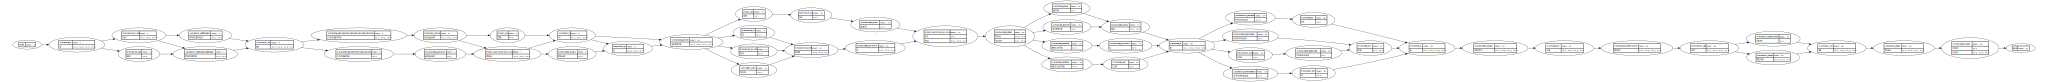

external table created!


In [3]:
from collatex import *
collation = Collation()
import csv, re
from general_functions import tag_poslemma
from general_functions import table_automaticDictionary


tag_poslemma('example1')  # ex: create_poslemma('example1')
print("taggedAll and taggedDistinct created in folder Dictionaries/ !")

M = open( "data/example1/M.txt", encoding='utf-8' ).read()
P = open( "data/example1/P.txt", encoding='utf-8' ).read()
R = open( "data/example1/R.txt", encoding='utf-8' ).read()
S = open( "data/example1/S.txt", encoding='utf-8' ).read()


#create the dictionary consisting of two columns, separated by a comma.
# The first Column 'Original' are the strings as found in the text, 
# the second column 'Normalised' contains the strings you want to replace them with. 
# No whitespaces behind the strings.
Normit = {}
with open('dictionaries/taggedDistinct_example1.csv') as csvfile:
    reader = csv.DictReader(csvfile, fieldnames=['Original', 'Normalised'])
    for row in reader:
        Normit[row['Original']]= row['Normalised']

#read in the witnesses  from your file system 
from collatex.core_classes import WordPunctuationTokenizer
tokenizer = WordPunctuationTokenizer()

# build a function to tokenize and to normalize by replace keys to be 
# found in the dictionary by the corresponding values 
def tokennormalizer(witness) :
    tokens_as_strings = tokenizer.tokenize(witness)
    list = []
    for token_string in tokens_as_strings:
        normversion = re.sub(r'\s+$',"", token_string)
        replaceversion = Normit.get(normversion,normversion)
        list.append({'t':token_string, 'n':replaceversion})
    return(list)

#collate
tokens_M = tokennormalizer(M) 
tokens_P = tokennormalizer(P) 
tokens_R = tokennormalizer(R) 
tokens_S = tokennormalizer(S) 

witness_M = { "id": "W1", "tokens":tokens_M }
witness_P = { "id": "W2", "tokens":tokens_P }
witness_R = { "id": "W3", "tokens":tokens_R }
witness_S = { "id": "W4", "tokens":tokens_S }


input = { "witnesses": [ witness_M, witness_P, witness_R, witness_S ] }



table = collate(input, output='html2', segmentation=False)
graphSvg = collate(input, output='svg', segmentation=False)

graph_automaticDictionary = collate(input, output='json', segmentation=False)
table_automaticDictionary(graph_automaticDictionary, 'example1')
print('external table created!')

In [10]:
from collatex import *
collation = Collation()
import csv, re
from general_functions import tag_poslemma
from general_functions import table_automaticDictionary


tag_poslemma('example1')  # ex: create_poslemma('example1')
print("taggedAll and taggedDistinct created in folder Dictionaries/ !")


A = open( "data/example1/A.txt", encoding='utf-8' ).read()
F = open( "data/example1/F.txt", encoding='utf-8' ).read()
G = open( "data/example1/G.txt", encoding='utf-8' ).read()
H = open( "data/example1/H.txt", encoding='utf-8' ).read()
M = open( "data/example1/M.txt", encoding='utf-8' ).read()
P = open( "data/example1/P.txt", encoding='utf-8' ).read()
R = open( "data/example1/R.txt", encoding='utf-8' ).read()
S = open( "data/example1/S.txt", encoding='utf-8' ).read()
V = open( "data/example1/V.txt", encoding='utf-8' ).read()


#create the dictionary consisting of two columns, separated by a comma.
# The first Column 'Original' are the strings as found in the text, 
# the second column 'Normalised' contains the strings you want to replace them with. 
# No whitespaces behind the strings.
Normit = {}
with open('dictionaries/taggedDistinct_example1.csv') as csvfile:
    reader = csv.DictReader(csvfile, fieldnames=['Original', 'Normalised'])
    for row in reader:
        Normit[row['Original']]= row['Normalised']

#read in the witnesses  from your file system 
from collatex.core_classes import WordPunctuationTokenizer
tokenizer = WordPunctuationTokenizer()

# build a function to tokenize and to normalize by replace keys to be 
# found in the dictionary by the corresponding values 
def tokennormalizer(witness) :
    tokens_as_strings = tokenizer.tokenize(witness)
    list = []
    for token_string in tokens_as_strings:
        normversion = re.sub(r'\s+$',"", token_string)
        replaceversion = Normit.get(normversion,normversion)
        list.append({'t':token_string, 'n':replaceversion})
    return(list)

tokens_A = tokennormalizer(A) 
tokens_F = tokennormalizer(F) 
tokens_G = tokennormalizer(G) 
tokens_H = tokennormalizer(H) 
tokens_M = tokennormalizer(M) 
tokens_P = tokennormalizer(P) 
tokens_R = tokennormalizer(R) 
tokens_S = tokennormalizer(S) 
tokens_V = tokennormalizer(V) 

witness_A = { "id": "W1", "tokens":tokens_A }
witness_F = { "id": "W2", "tokens":tokens_F }
witness_G = { "id": "W3", "tokens":tokens_G }
witness_H = { "id": "W4", "tokens":tokens_H }
witness_M = { "id": "W1", "tokens":tokens_M }
witness_P = { "id": "W2", "tokens":tokens_P }
witness_R = { "id": "W3", "tokens":tokens_R }
witness_S = { "id": "W4", "tokens":tokens_S }
witness_V = { "id": "W1", "tokens":tokens_V }


input = { "witnesses": [ witness_A, witness_F, witness_G, witness_H, witness_M, witness_P, witness_R, witness_S, witness_V ] }



table = collate(input, output='html2', segmentation=False)
graphSvg = collate(input, output='svg', segmentation=False)

graph_automaticDictionary = collate(input, output='json', segmentation=False)
table_automaticDictionary(graph_automaticDictionary, 'example1')
print('external table created!')

taggedAll and taggedDistinct created in folder Dictionaries/ !


KeyError: 244